In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from uedge import *
from uedge.hdf5 import *
#import plotmesh as pm
from uetools import Case
from uedge.gridue import write_gridue
from Forthon import gchange

UEDGE configuration file /Users/paullab/.uetoolsrc read.


# Notes
* plate1_vert_shortleg: (x,y) coordinates of plates
* Naming scheme: filetype (gridue/converge)\_v#\_secondaryflag_divertorshape.filetype
* reconverged2 is secondary convergence pass with different bbb flags
* TODO: after converging, renaming new grid file in yaml causes fnorm to be large and not converge

# Procedure
## Use gridgen.py to create hdf5 gridue
* Aeqdsk needs the x point (rb, zb, rt, zt) coordinates at line 20
* Aeqdsk needs strike point (0, rin, zin, rout, zout) coordinates line 58,59
* Gridgen: iterate flx.psi0sep to get the flux surface through x point and strike point
* Make sure the correct plate geometry is imported
## Converge UEDGE
* Add the hdf5 grid file to the YAML input file
* Name the hdf5 save file correctly (name differently than preconverged file)
* Converge with dtreal=1e-10, if doesn't work, set bbb.gamsec = 1 (for striations issue), bbb.isbcwdt = 1 (for converging errors)
* If the initial fnrm starts increasing rapidly when time-step is ~1e-8
* If converged, change input YAML file to point to new save file, if working in the same notebook shouldn't need to

# Generate Grid

UEDGE configuration file /Users/paullab/.uetoolsrc read.
 
***  alfcy_inner has been re-defined  ***
 
 
     alfcy_inner =   2.619560E+00
 ***** Grid generation has been completed
 Wrote file "gridue" with runid:  TokaMaker:                                                  

 Wrote grid file successfully:
     file name:   gridue_v9_orthogonal.hdf5
     run-ID:      TokaMaker:
 ***** Grid generation has been completed
 Wrote file "gridue" with runid:  TokaMaker:                                                  

 Wrote grid file successfully:
     file name:   gridue_v9_shaped_vertical2.hdf5
     run-ID:      TokaMaker:
***********************************************
** CAUTION: NOT USING METHG=66 FOR ISNONOG=1 **
***********************************************
 
***  alfcy_inner has been re-defined  ***
 
 
     alfcy_inner =   2.619560E+00
 ***** Grid generation has been completed
 Wrote file "gridue" with runid:  TokaMaker:                                                  


*** UE

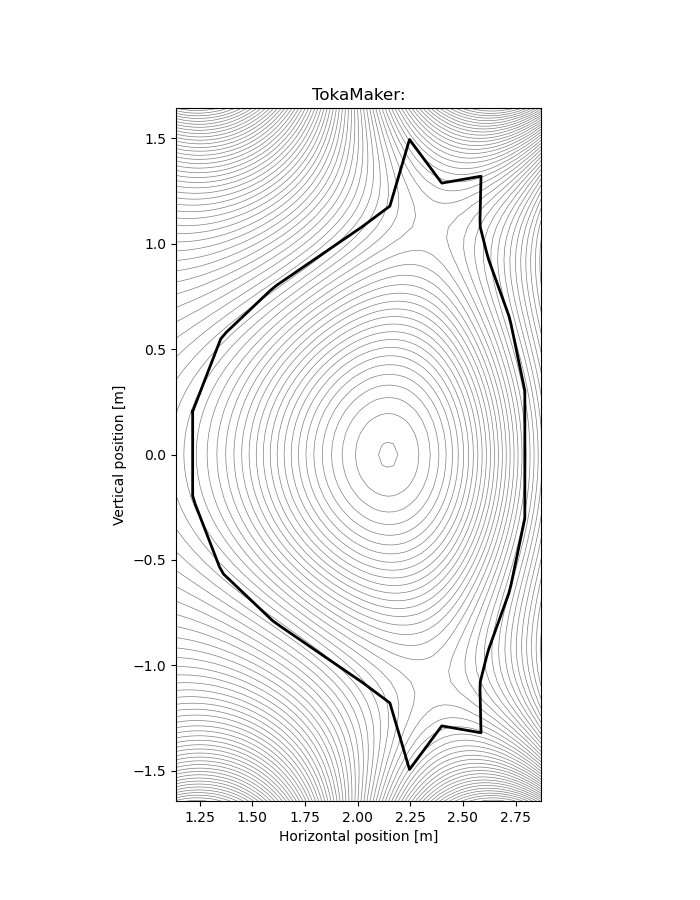

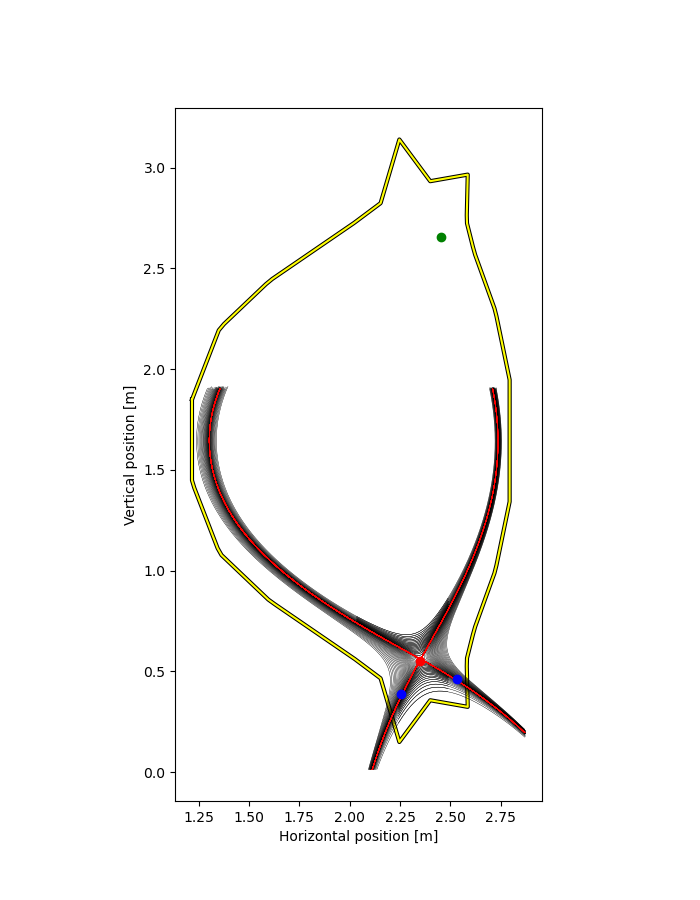

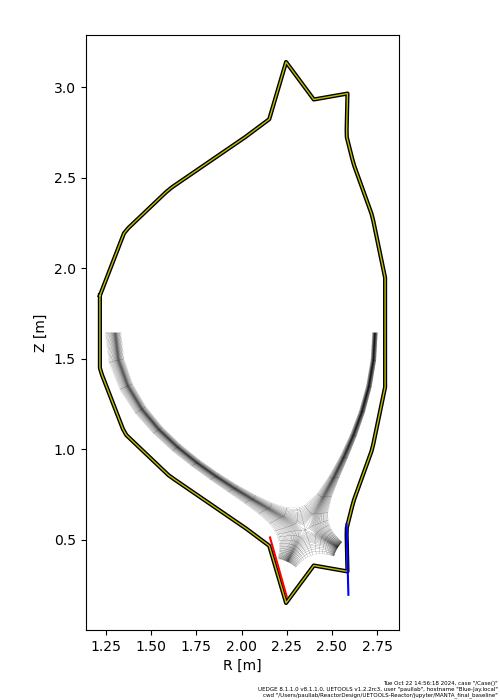

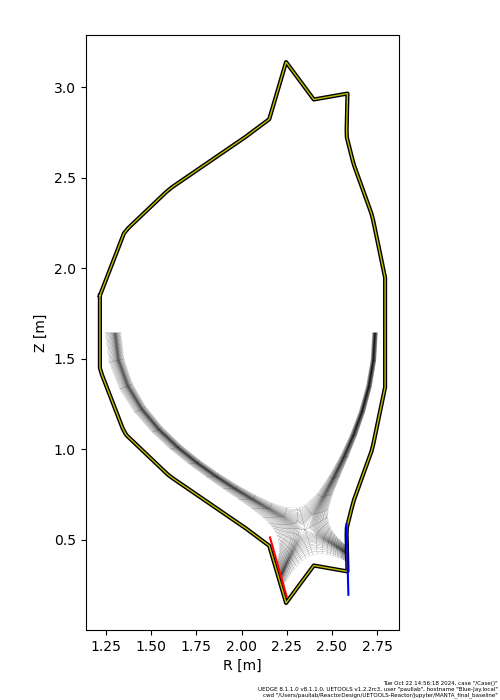

In [1]:
# %matplotlib widget
from gridgen_v9_vertical import setGrid
setGrid()

# Create Case from YAML

In [2]:
c = Case('input_v9.yaml')

No diffusivity-file supplied: reading from save-file ".../jupyter/MANTA_final_baseline/reconverged2_v9_vertical_last_ii2.hdf5"
  User-specified diffusivities read from HDF5 file ".../jupyter/MANTA_final_baseline/reconverged2_v9_vertical_last_ii2.hdf5"
UETOOLS-style save successfully restored from .../jupyter/MANTA_final_baseline/reconverged2_v9_vertical_last_ii2.hdf5

*** UEDGE arrays populated: WARNING, case NOT converged ***
fnrm without preconditioning: 3.84e+16



# Converge

In [4]:
bbb.gamsec = 1 # striation fix
bbb.isbcwdt = 1 # convergence error fix
bbb.icntnunk = 0
c.converge(savefname='reconverged2_v9_closed', dtreal=1e-10)


Requested save-path ../solutions not found, writing to cwd!
*----------------------------------------------------------*
 Need to take initial step with Jacobian; trying to do here 
*----------------------------------------------------------*
 Reading grid data from /Users/paullab/ReactorDesign/UETOOLS-Reactor/jupyter/MANTA_final_baseline/gridue_v9_shaped_vertical2.hdf5
 Grid data read successfully:
     file name:   /Users/paullab/ReactorDesign/UETOOLS-Reactor/jupyter/MANTA_final_baseline/gridue_v9_shaped_vertical2.hdf5
     run-ID:      TokaMaker:                                                  
  Updating Jacobian, npe =                      1
*-------------------------------------------------------------------* iter=    0 fnrm=      5.519299112574476     nfe=      1
  Updating Jacobian, npe =                      2
 iter=    1 fnrm=      5.379776709102644     nfe=      5
 iter=    2 fnrm=      5.360359942532347     nfe=     11
 iter=    3 fnrm=      5.348692468848167     nfe=     

In [6]:
bbb.iterm

1

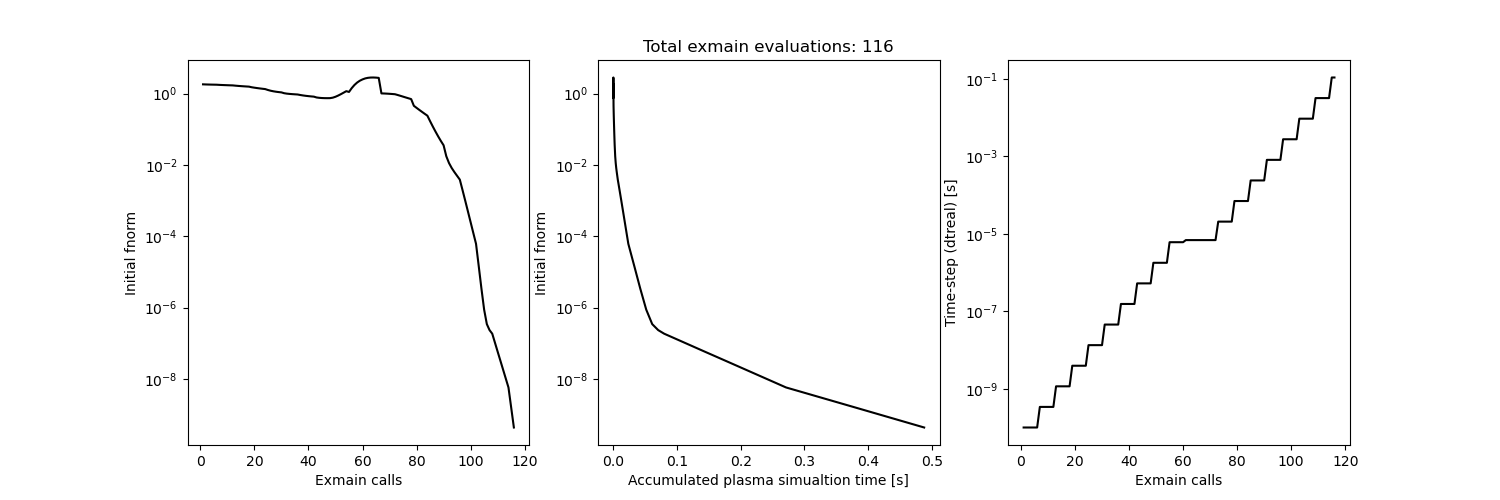

In [7]:
c.solver.convergenceanalysis('reconverged_v9_open_last_ii2.hdf5');

# Inner plate

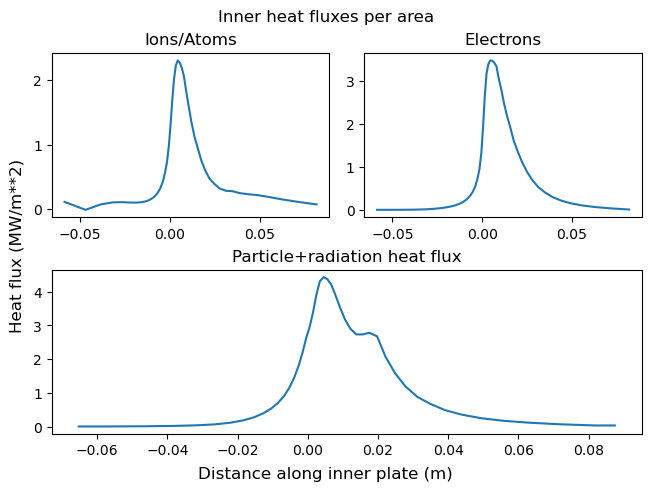

In [3]:
# %matplotlib widget
fig, axs = plt.subplot_mosaic(
    [['TopLeft', 'TopRight'],
     ['Bottom', 'Bottom']],
    layout='constrained',  # Automatically adjust layout
    width_ratios=[1, 1],   # Equal width for the top plots
)
fig.suptitle('Inner heat fluxes per area')
fig.supxlabel('Distance along inner plate (m)')
fig.supylabel('Heat flux (MW/m**2)')
# axs['TopRight'].set_xlabel("Distance along inner plate (m)")
#axs['TopRight'].set_ylabel("feex (W)")
axs['TopRight'].set_title("Electrons")
axs['TopRight'].plot(com.yylb[1:-1],-bbb.feex[0,1:-1]/com.sx[0,1:-1]*1e-6)

# axs['TopLeft'].set_xlabel("Distance along inner plate (m)")
# axs['TopLeft'].set_ylabel("Heat flux (MW/m**2)")
axs['TopLeft'].set_title("Ions/Atoms")
axs['TopLeft'].plot(com.yylb[1:-1],-bbb.feix[0,1:-1]/com.sx[0,1:-1]*1e-6) #polodal east field area


bbb.plateflux(); #internally calculated fluxes (postprocessing)
# axs['Bottom'].set_xlabel("Distance along inner plate (m)")
# axs['Bottom'].set_ylabel("Heat flux [MW/m**2]")
axs['Bottom'].set_title("Particle+radiation heat flux")
axs['Bottom'].plot(com.yylb,1.e-6*(bbb.sdtlb+bbb.sdrlb))
plt.show()

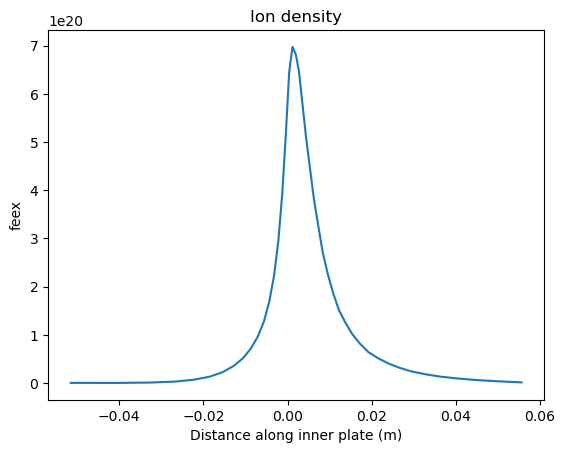

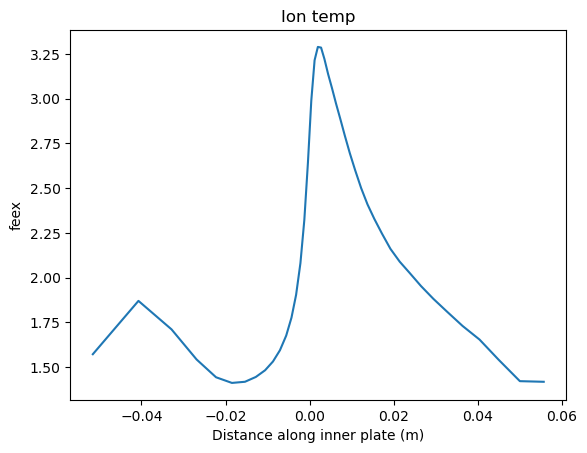

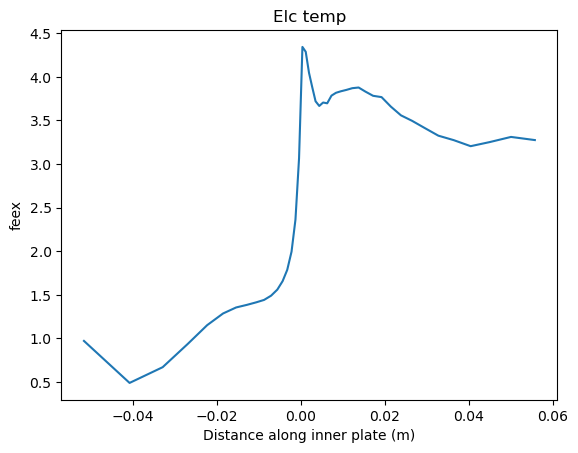

In [11]:
# %matplotlib inline
plt.cla()
plt.xlabel("Distance along inner plate (m)")
plt.ylabel("feex")
plt.title("Ion density")
plt.plot(com.yylb[1:-1],bbb.ni[0,1:-1,0])
plt.show()
plt.xlabel("Distance along inner plate (m)")
plt.ylabel("feex")
plt.title("Ion temp")
plt.plot(com.yylb[1:-1],bbb.ti[0,1:-1]/bbb.ev)
plt.show()
plt.xlabel("Distance along inner plate (m)")
plt.ylabel("feex")
plt.title("Elc temp")
plt.plot(com.yylb[1:-1],bbb.te[0,1:-1]/bbb.ev)
plt.show()

# Midplane

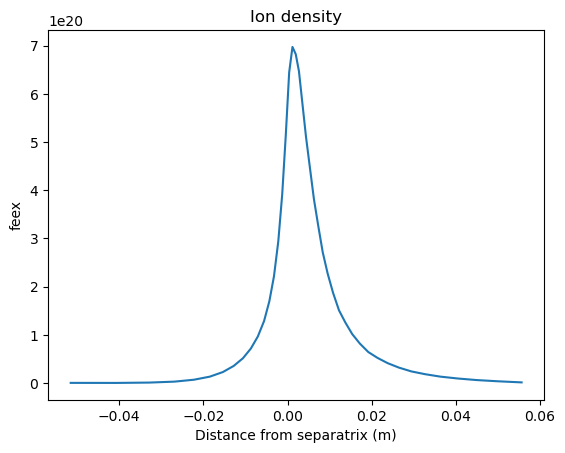

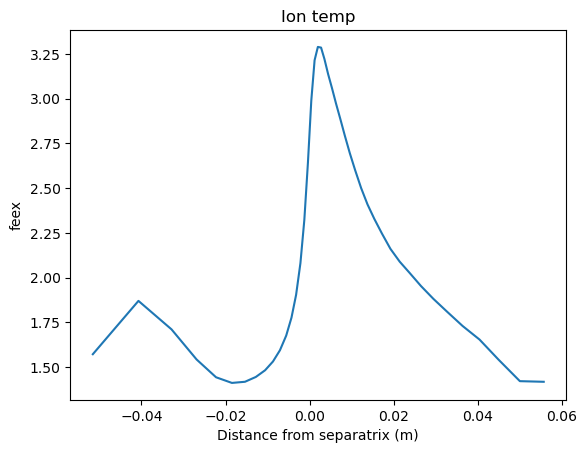

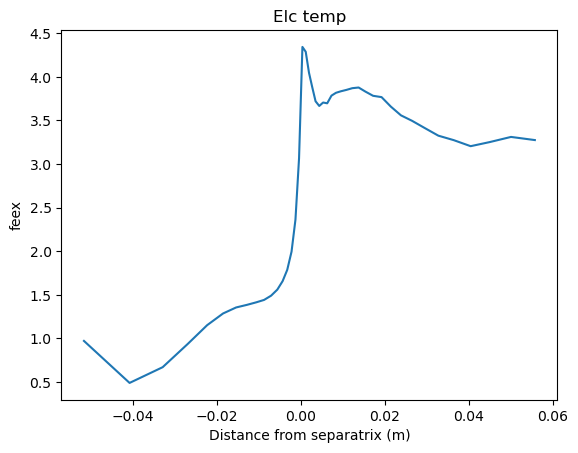

In [12]:
plt.xlabel("Distance from separatrix (m)")
plt.ylabel("feex")
plt.title("Ion density")
plt.plot(com.yylb[1:-1],bbb.ni[bbb.ixmp,1:-1,0])
plt.show()
plt.xlabel("Distance from separatrix (m)")
plt.ylabel("feex")
plt.title("Ion temp")
plt.plot(com.yylb[1:-1],bbb.ti[bbb.ixmp,1:-1]/bbb.ev)
plt.show()
plt.xlabel("Distance from separatrix (m)")
plt.ylabel("feex")
plt.title("Elc temp")
plt.plot(com.yylb[1:-1],bbb.te[bbb.ixmp,1:-1]/bbb.ev)
# plt.xlim(-0.01,None)
# plt.ylim(0,700)
plt.show()

# Outer plate

<Figure size 640x480 with 0 Axes>

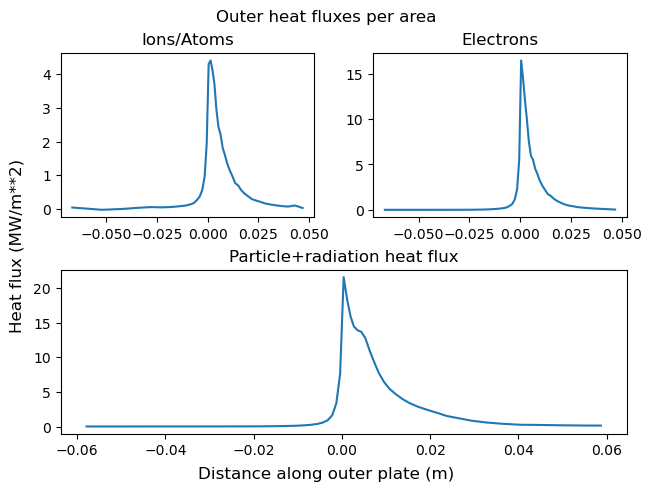

In [11]:
# total convective and conductive heat flux
# 2nd char: e for energy n for particle
plt.figure()
fig, axs = plt.subplot_mosaic(
    [['TopLeft', 'TopRight'],
     ['Bottom', 'Bottom']],
    layout='constrained',  # Automatically adjust layout
    width_ratios=[1, 1],   # Equal width for the top plots
)
fig.suptitle('Outer heat fluxes per area')
fig.supxlabel('Distance along outer plate (m)')
fig.supylabel('Heat flux (MW/m**2)')
# axs['TopRight'].set_xlabel("Distance along inner plate (m)")
#axs['TopRight'].set_ylabel("feex (W)")
axs['TopRight'].set_title("Electrons")
axs['TopRight'].plot(com.yyrb[1:-1],bbb.feex[com.nx,1:-1]/com.sx[0,1:-1]*1e-6)

# axs['TopLeft'].set_xlabel("Distance along inner plate (m)")
# axs['TopLeft'].set_ylabel("Heat flux (MW/m**2)")
axs['TopLeft'].set_title("Ions/Atoms")
axs['TopLeft'].plot(com.yyrb[1:-1],bbb.feix[com.nx,1:-1]/com.sx[0,1:-1]*1e-6) #polodal east field area


bbb.plateflux(); #internally calculated fluxes (postprocessing)
# axs['Bottom'].set_xlabel("Distance along inner plate (m)")
# axs['Bottom'].set_ylabel("Heat flux [MW/m**2]")
axs['Bottom'].set_title("Particle+radiation heat flux")
axs['Bottom'].plot(com.yylb,1.e-6*(bbb.sdtrb+bbb.sdrrb))
plt.show()

# 2D Plots

<Figure size 640x480 with 0 Axes>

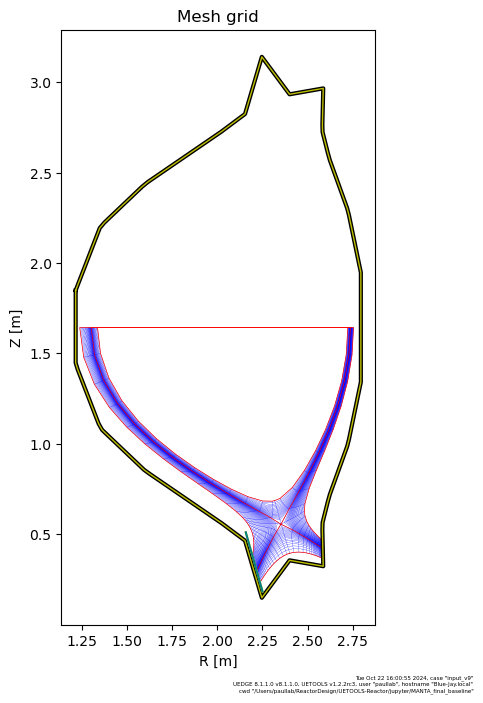

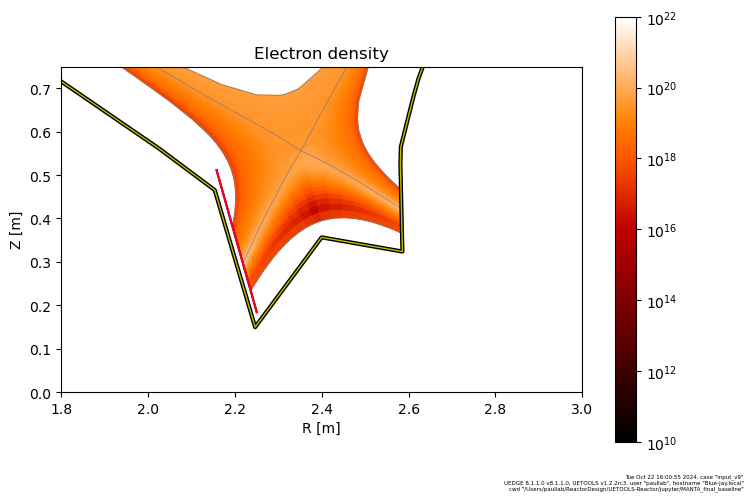

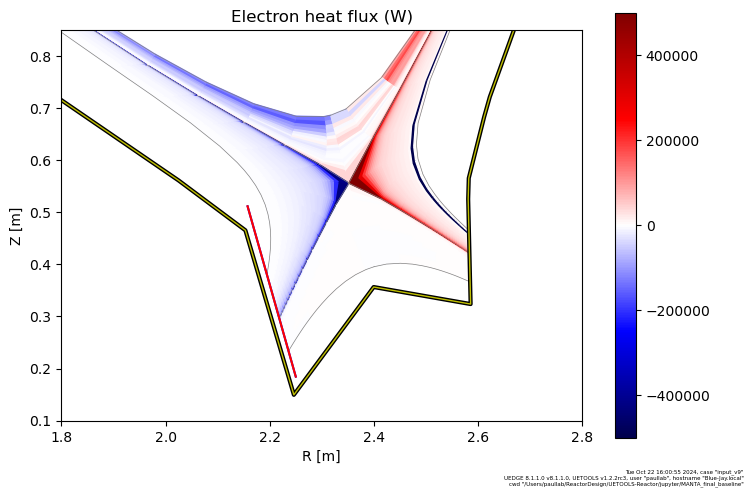

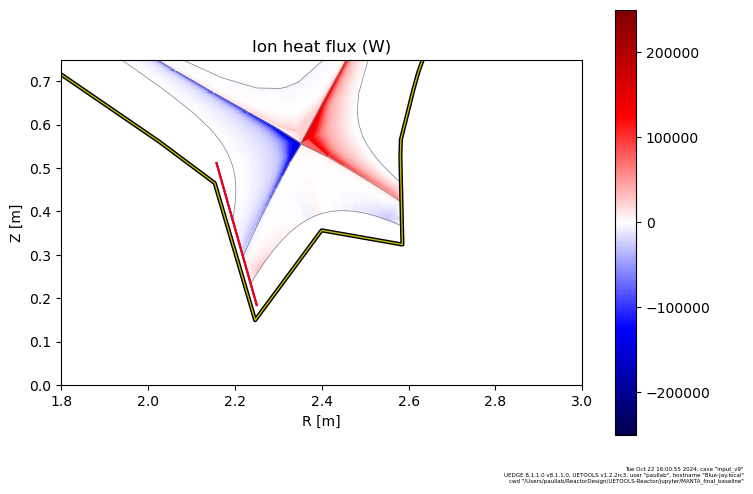

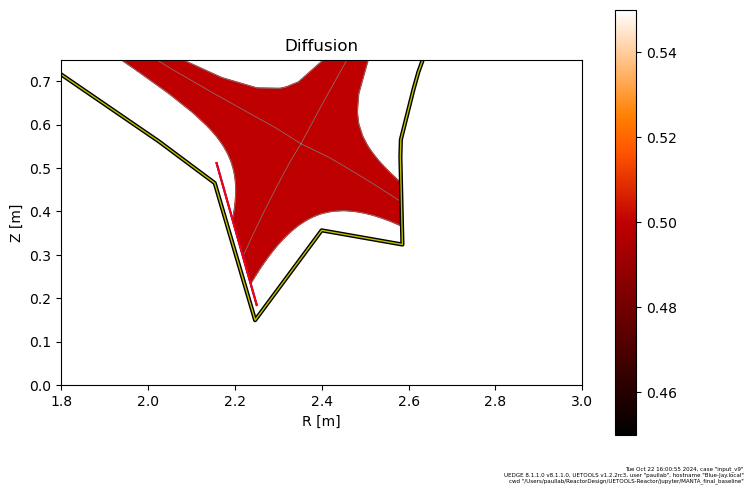

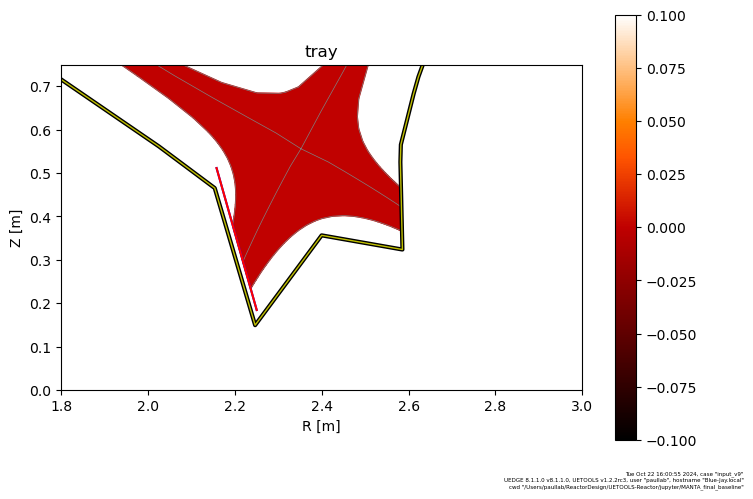

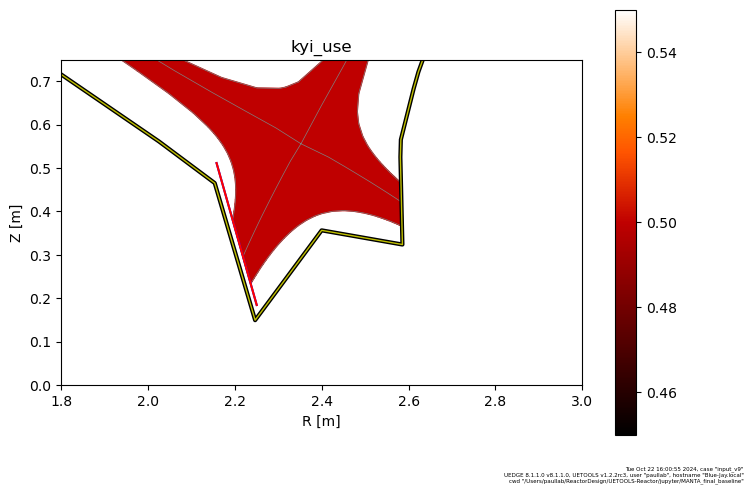

In [3]:
plt.figure()
c.plot.grid(linewidth=0.1, #grid plot
   vessel=True, 
   plates=True, 
   platecolor=['gold','teal'], 
   lcfs=True, 
   lcfscolor='r', 
   linecolor='b',
   title='Mesh grid'
  );

c.plot.mesh(
    bbb.ne, 
    log=True, 
    xlim=(1.8, 3), 
    ylim=(0,0.75), 
    figsize=(7,5), 
    zrange=(1e10,1e22), 
    cmap='gist_heat',
    title='Electron density'
);


c.plot.mesh(
    bbb.feex, 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85), 
    figsize=(7,5), 
    zrange=(-5e5,5e5),
    cmap='seismic',
    title='Electron heat flux (W)'
);
c.plot.mesh(
    bbb.feix, 
    xlim=(1.8, 2.8), 
    ylim=(0.1,0.85),
    figsize=(7,5), 
    zrange=(-2.5e5,2.5e5),
    cmap='seismic',
    title='Ion heat flux (W)'
);
c.plot.mesh(
    bbb.dif_use[:,:,0], 
    # log=True, 
    xlim=(1.8, 3.), 
    ylim=(0,0.75), 
    figsize=(7,5), 
    # zrange=(.42,.48), 
    cmap='gist_heat',
    title='Diffusion'
);
# dif_use=0.5=kyi=kye
#tray_use=0.0
c.plot.mesh(
    bbb.tray_use[:,:,0], 
    # log=True, 
    xlim=(1.8, 3.), 
    ylim=(0,0.75), 
    figsize=(7,5), 
    # zrange=(.42,.48), 
    cmap='gist_heat',
    title='tray'
);
c.plot.mesh(
    bbb.kye_use, 
    # log=True, 
    xlim=(1.8, 3.), 
    ylim=(0,0.75), 
    figsize=(7,5), 
    # zrange=(.42,.48), 
    cmap='gist_heat',
    title='kyi_use'
);
plt.show()

In [11]:
c.search.var("isbcwdt")

Package:    bbb
Group:      UEpar
Attributes: UEpar solver 
Type:       integer
Address:    4615571448
Unit:       
Comment:
include dtreal in B.C. if isbcwdt=1


In [ ]:
plt.figure()
fig, axs = plt.subplot_mosaic(
    [['Top', 'Top'],
     ['Bottom', 'Bottom']],
    layout='constrained',  # Automatically adjust layout
    width_ratios=[1, 1],   # Equal width for the top plots
)
# fig.suptitle('Particle + Radiation Heat Flux')
axs['Bottom'].set_title('Distance along outer plate (m)')
fig.supylabel('Particle + Radiation Heat flux (MW/m**2)')
axs['Bottom'].plot(com.yylb,1.e-6*(bbb.sdtrb+bbb.sdrrb))
axs['Top'].set_title('Distance along Inner plate (m)')
axs['Top'].plot(com.yylb,1.e-6*(bbb.sdtlb+bbb.sdrlb))